<a href="https://colab.research.google.com/github/littlesam0909/SEEM3650_project/blob/main/logistic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Predicted Annual Mean Air Pollution Index for 2014: 1
Predicted API Level for 2014: High


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


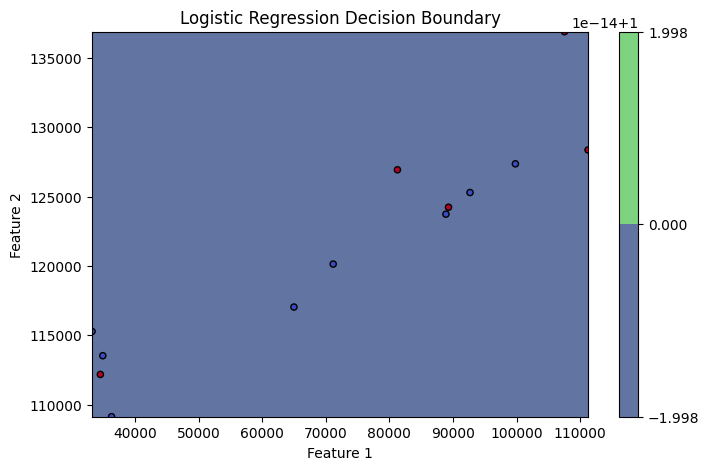

In [ ]:
# @title
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load the dataset
data = pd.read_csv('data-seem3650.csv')

# Define features and target variable for data from 2001-2013
X_train = data.iloc[:, 1:7]  # Features: Columns 1 to 6 (excluding 'Annual Mean Air Pollution Index')
y_train = (data['api level'] == 'High').astype(int)  # Target variable

# Train the logistic regression model using data from 2001-2013
log_reg_model = LogisticRegression()
log_reg_model.fit(X_train, y_train)

# Manually define the data for 2014 (excluding 'Annual Mean Air Pollution Index')
data_2014 = pd.DataFrame({
    'Sulphur Dioxide (SO2)': [33220],
    'Nitrogen Oxides (NOx)': [109830],
    'Respirable Suspended Particulates (PM10)': [6010],
    'Fine Suspended Particulates (PM2.5)': [4720],
    'Volatile Organic Compounds (VOC)': [28850],
    'Carbon Monoxide (CO)': [69100],
})

# Predict the Annual Mean Air Pollution Index for 2014
index_2014_pred = log_reg_model.predict(data_2014)

# Determine the API level based on the predicted index
api_level_2014 = "High" if index_2014_pred[0] == 1 else "Medium"

print("Predicted Annual Mean Air Pollution Index for 2014:", index_2014_pred[0])
print("Predicted API Level for 2014:", api_level_2014)

# Plotting the logistic regression graph
# Plotting the logistic regression graph
# Plotting the logistic regression graph
plt.figure(figsize=(8, 5))  # Decrease figure size

# Plot decision boundary
x_min, x_max = X_train.iloc[:, 0].min() - 1, X_train.iloc[:, 0].max() + 1
y_min, y_max = X_train.iloc[:, 1].min() - 1, X_train.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 2), np.arange(y_min, y_max, 2))  # Increase step size from 0.1 to 2

# Generate meshgrid for all features
meshgrid_data = np.c_[xx.ravel(), yy.ravel(),
                      np.zeros(xx.ravel().shape), np.zeros(xx.ravel().shape),
                      np.zeros(xx.ravel().shape), np.zeros(xx.ravel().shape)]
Z = log_reg_model.predict_proba(meshgrid_data)[:, 1]
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, levels=10, alpha=0.8)  # Decrease contour levels to 10
plt.colorbar()

# Plot data points
plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c=y_train, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Logistic Regression Decision Boundary')
plt.show()